<a href="https://colab.research.google.com/github/abhisekhp20/Capstone-1-EDA-on-Global-Terrorism_Abhisekh_Patro/blob/main/Final_self_project_Abhisekh_patro_EDA_Global_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
directory="/content/drive/MyDrive/Global Terrorism Data.csv"

In [2]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
x=pd.read_csv(directory,encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
x.head()   #watching the few top entries in dataset 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
x.info()  # watching the memory usage 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
x.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [8]:
list1=[]
x.columns
for i in x.columns:
  list1.append(i)

In [9]:
print(list1) # to see the columns in our imported dataset

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [10]:
x=x[["iyear","imonth","iday","country_txt","region_txt","city","latitude","longitude","success","attacktype1_txt",
       "targtype1_txt","targsubtype1_txt","gname","motive","weaptype1_txt","provstate","weapsubtype1_txt","nkill","nwound","property",
       "propextent_txt"]]
x.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,success,attacktype1_txt,...,targsubtype1_txt,gname,motive,weaptype1_txt,provstate,weapsubtype1_txt,nkill,nwound,property,propextent_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,...,Named Civilian,MANO-D,NaN,Unknown,NaN,NaN,1.0,0.0,0,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),...,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,NaN,Unknown,Federal,NaN,0.0,0.0,0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,...,Radio Journalist/Staff/Facility,Unknown,NaN,Unknown,Tarlac,NaN,1.0,0.0,0,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,1,Bombing/Explosion,...,Embassy/Consulate,Unknown,NaN,Explosives,Attica,Unknown Explosive Type,NaN,NaN,1,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,...,Embassy/Consulate,Unknown,NaN,Incendiary,Fukouka,NaN,NaN,NaN,1,NaN


In [11]:
#Renaming the column heads for better understanding
x.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region",
                   "city":"City","latitude":"Latitude","longitude":"Longitude","success":"Success","attacktype1_txt":"Attack_Type",
                   "targtype1_txt":"Target","targsubtype1_txt":"Target_Sub","gname":"Terrorist_Organisation","motive":"Motive","weaptype1_txt":"Weopon_Type",
                   "provstate":"State","weapsubtype1_txt":"Weopon_Subtype","nkill":"Killed","nwound":"Wounded","property":"Property",
                   "propextent_txt":"Property_Damage"},inplace=True)
x.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,Success,Attack_Type,...,Target_Sub,Terrorist_Organisation,Motive,Weopon_Type,State,Weopon_Subtype,Killed,Wounded,Property,Property_Damage
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,...,Named Civilian,MANO-D,NaN,Unknown,NaN,NaN,1.0,0.0,0,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),...,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,NaN,Unknown,Federal,NaN,0.0,0.0,0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,...,Radio Journalist/Staff/Facility,Unknown,NaN,Unknown,Tarlac,NaN,1.0,0.0,0,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,1,Bombing/Explosion,...,Embassy/Consulate,Unknown,NaN,Explosives,Attica,Unknown Explosive Type,NaN,NaN,1,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,...,Embassy/Consulate,Unknown,NaN,Incendiary,Fukouka,NaN,NaN,NaN,1,NaN


In [12]:
x.isna().sum().sort_values(ascending=False) #  checking the null values in the columns

Motive                    131130
Property_Damage           117626
Weopon_Subtype             20768
Wounded                    16311
Target_Sub                 10373
Killed                     10313
Longitude                   4557
Latitude                    4556
City                         434
State                        421
Property                       0
Weopon_Type                    0
Year                           0
Terrorist_Organisation         0
Month                          0
Attack_Type                    0
Success                        0
Region                         0
Country                        0
Day                            0
Target                         0
dtype: int64

In [13]:
#Replacing the null values with 0 and "Unknown"
x[["Killed","Wounded"]]=x[["Killed","Wounded"]].fillna(0)
x["Motive"]=x["Motive"].fillna("Unknown")
x[["Weopon_Subtype","Target_Sub","Longitude","Latitude","City","State"]]=x[["Weopon_Subtype","Target_Sub","Longitude","Latitude","City","State"]].fillna("Unknown")
x["Casualty"]=x["Killed"]+x["Wounded"]
#df["Number of Attacks"]=np.ones((181691,1))
#df["Counts"]=np.ones((181691,1))
#df["Number of Attacks"]=np.arange(1,181692,1)
x["Property_Damage"]=x["Property_Damage"].fillna("Unknown")
#Replacing the Property Contents
x.loc[x["Property"]==1,"Property"]="yes"
x.loc[x["Property"]==0,"Property"]="No"
x.loc[x["Property"]==(-9),"Property"]="Unknown"

In [14]:
x.isna().sum()

Year                      0
Month                     0
Day                       0
Country                   0
Region                    0
City                      0
Latitude                  0
Longitude                 0
Success                   0
Attack_Type               0
Target                    0
Target_Sub                0
Terrorist_Organisation    0
Motive                    0
Weopon_Type               0
State                     0
Weopon_Subtype            0
Killed                    0
Wounded                   0
Property                  0
Property_Damage           0
Casualty                  0
dtype: int64

In [ ]:
x.shape




(181691, 22)

In [ ]:
x.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,Success,Attack_Type,...,Terrorist_Organisation,Motive,Weopon_Type,State,Weopon_Subtype,Killed,Wounded,Property,Property_Damage,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,...,MANO-D,Unknown,Unknown,Unknown,Unknown,1.0,0.0,No,Unknown,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),...,23rd of September Communist League,Unknown,Unknown,Federal,Unknown,0.0,0.0,No,Unknown,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,...,Unknown,Unknown,Unknown,Tarlac,Unknown,1.0,0.0,No,Unknown,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.99749,23.762728,1,Bombing/Explosion,...,Unknown,Unknown,Explosives,Attica,Unknown Explosive Type,0.0,0.0,yes,Unknown,0.0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,...,Unknown,Unknown,Incendiary,Fukouka,Unknown,0.0,0.0,yes,Unknown,0.0



# Top 10 dangerous cities in the world

<BarContainer object of 10 artists>


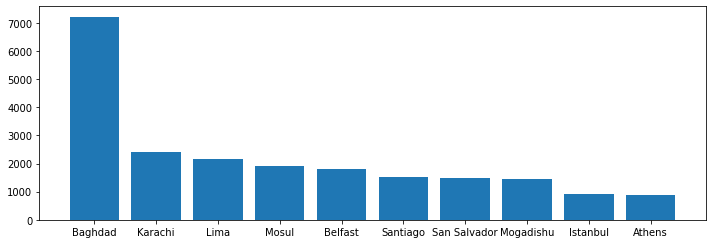

In [31]:
#Cities are found using the corresponding sum of successfull attacks
City_dang=x.groupby("City").Success.sum().sort_values(ascending=False)
data2=City_dang[1:11].index
data1=City_dang[1:11]
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [10.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
bb=plt.bar(data2, data1)


# Display the plot
print(bb)



From the bar graph we can see that Baghdad is the dangerous city in the world after that karachi. These are the 10 cities who faced highest sucessfull attacks from terror groups  

# Top 10 countries with good anti terrorism strategies 


In [32]:
#country_fail_attacks =pd.crosstab(index=x['Success'], columns=x['Country'])  
country_fail_attacks=x[["Country","Success"]]
print(country_fail_attacks)



                         


                   Country  Success
0       Dominican Republic        1
1                   Mexico        1
2              Philippines        1
3                   Greece        1
4                    Japan        1
...                    ...      ...
181686             Somalia        1
181687               Syria        1
181688         Philippines        1
181689               India        0
181690         Philippines        0

[181691 rows x 2 columns]


In [33]:
li_countries=list(country_fail_attacks["Country"])
print(len(li_countries))

181691


In [34]:
new_frame=x[x.Success==0]

In [35]:
failed_attempts=new_frame['Country'].value_counts()

In [36]:
total_attempts=x["Country"].value_counts()
total_attempts


Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

In [37]:
from numpy.lib.function_base import percentile
fail_percent=(failed_attempts/total_attempts)*100 #finding the percentage of failed attacks countrywise
top_safe_countries=fail_percent.sort_values(ascending=False)  #sorting the data in descending wise
top_safe_countries[0:10] # showing Top 10 countries with highest failed attack percentage 

Mauritius       100.000000
Brunei          100.000000
Vatican City    100.000000
Gambia           66.666667
Ireland          54.723127
Turkmenistan     50.000000
New Zealand      45.000000
Vietnam          41.666667
Comoros          40.000000
Grenada          40.000000
Name: Country, dtype: float64

plot a map or globe and highlight only these countries

In [38]:
#Visulizing the number of attacks from 1970 to 2017 for each country in Globe
att=top_safe_countries[0:10]
att
Orthograph=px.choropleth(att,locations=top_safe_countries[0:10].index,locationmode="country names",color=att,
                         range_color=(0,100),hover_name=top_safe_countries[0:10].index,projection="orthographic",title="Total Number of Attacks(1970-2017)",
                         labels={"Year":"Attacks"})
Orthograph.show()

In [39]:
print(f"The top 10 countries where terror attacks failure rate are high are: \n{top_safe_countries[0:10]} ")

The top 10 countries where terror attacks failure rate are high are: 
Mauritius       100.000000
Brunei          100.000000
Vatican City    100.000000
Gambia           66.666667
Ireland          54.723127
Turkmenistan     50.000000
New Zealand      45.000000
Vietnam          41.666667
Comoros          40.000000
Grenada          40.000000
Name: Country, dtype: float64 


# Methods used by top 5 terror groups in successful missions

In [40]:
df_new=x[x.Success==1]
#finding the successfull attacks by each terror organisation and showing top 5 organisations
top_terror_groups=df_new["Terrorist_Organisation"].value_counts()
top_5_terror_groups=top_terror_groups.sort_values(ascending=False)[1:6]
top_5_terror_groups

Taliban                                             6680
Islamic State of Iraq and the Levant (ISIL)         4759
Shining Path (SL)                                   4337
Farabundo Marti National Liberation Front (FMLN)    3317
Al-Shabaab                                          3016
Name: Terrorist_Organisation, dtype: int64

In [41]:
#finding the total data on methods used for successful mission by each terror organisation
terror_attack_method=df_new.groupby("Terrorist_Organisation").Weopon_Type.value_counts().sort_values(ascending=False)
terror_attack_method["Taliban"]

Weopon_Type
Explosives                                                                     2951
Firearms                                                                       2392
Unknown                                                                         996
Incendiary                                                                      206
Melee                                                                           102
Chemical                                                                         22
Other                                                                             5
Sabotage Equipment                                                                4
Radiological                                                                      1
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       1
Name: Weopon_Type, dtype: int64

In [42]:
li_top_5_terror_groups=list(top_5_terror_groups.index)
ra_li=[]
for i in li_top_5_terror_groups:
  z=terror_attack_method[str(i)].index[0]
  ra_li.append(z)
tp_5_terr_attack_group_method=dict(zip(li_top_5_terror_groups,ra_li))
print(f"The top 5 terror organisations and there most used type of attack method are : \n{tp_5_terr_attack_group_method} ")

 



The top 5 terror organisations and there most used type of attack method are : 
{'Taliban': 'Explosives', 'Islamic State of Iraq and the Levant (ISIL)': 'Explosives', 'Shining Path (SL)': 'Explosives', 'Farabundo Marti National Liberation Front (FMLN)': 'Firearms', 'Al-Shabaab': 'Explosives'} 


In [43]:
#Visulising the above framework in piechart(Methods of Attacks and their number of uses by Deadliest Terrorist Groups)
em=[]
for i in li_top_5_terror_groups:
 em.append(px.pie(terror_attack_method[str(i)],values=terror_attack_method[str(i)][0:8],names=terror_attack_method[str(i)][0:8].index))

In [44]:
names=list(terror_attack_method["Taliban"][0:6].index)
names
values=list(terror_attack_method["Taliban"][0:6])
values

[2951, 2392, 996, 206, 102, 22]

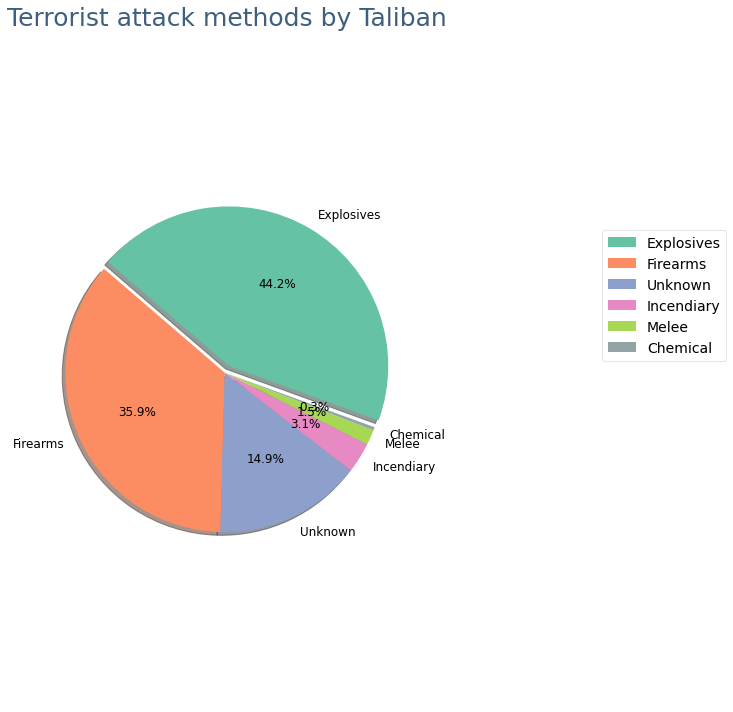

In [45]:

fig,ax=plt.subplots(figsize=(10,10))
patches,texts,autotexts=ax.pie(values,labels=names,
                                autopct='%1.1f%%',startangle=-20,
                                shadow=True,explode=(0.05,0,0,0,0.0,0.0),
                                colors=sns.color_palette('Set2',8)[:5]+
                                [(0.58,0.64,0.65)],
                                textprops={'fontsize':12,'weight':'light','color':'k'})
ax.axis('equal')
plt.title('Terrorist attack methods by Taliban',fontsize=25,pad=-70,
           color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.tight_layout()
ax.legend(loc='lower right',framealpha=0.5,bbox_to_anchor=(1.8,0.5,0.1,1),
           prop={'size':14})
fig.show()

# Number of attacks in a period of 5 years

In [46]:
#Total Number of Attacks from 1970 to 2017
Total_Attacks=len(x.Year.unique())
print(Total_Attacks)

47


In [47]:
 df=x.groupby("Year")["Month"].count().reset_index()

In [48]:
c=0
lis=[]
for i in range(9):
 sum_of_act=df['Month'][c:c+5].sum()
 c+=5
 lis.append(sum_of_act)
lis


[2744, 7170, 14157, 17003, 20178, 10398, 7700, 20352, 57502]

Text(0, 0.5, 'Number of Attacks')

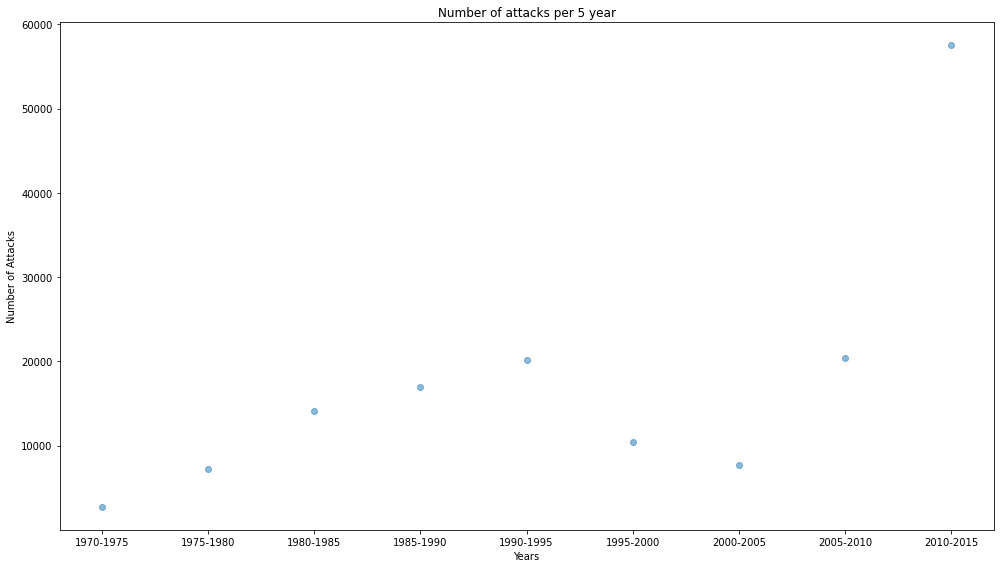

In [49]:
ylis=np.array(lis)
xlis=np.array(["1970-1975","1975-1980","1980-1985","1985-1990","1990-1995","1995-2000","2000-2005","2005-2010","2010-2015"])
plt.figure(figsize=(14, 8))
plt.scatter(xlis,ylis,alpha=0.5)
plt.title("Number of attacks per 5 year")
plt.xlabel("Years")
plt.ylabel("Number of Attacks")

We can see that as the year progresses from 1970 till 1995 there was continous increase in attacks but later after 2005 we can see a spike in attacks around the world

# Average kills per 5 year

In [50]:
x.Killed.sort_values(ascending=False)

133518    1570.0
73126     1384.0
73127     1383.0
55934     1180.0
136283     953.0
           ...  
110236       0.0
44062        0.0
44063        0.0
110233       0.0
181690       0.0
Name: Killed, Length: 181691, dtype: float64

In [51]:
av_kill=x[x.Success==1]

In [52]:
kill_year=av_kill.groupby("Year").Killed.sum()
av_kill_5_year_li=[]
j=0
for i in range(10):
 x_lb=kill_year[j:j+5]
 av_5_yr_kill=x_lb.sum()/5
 av_kill_5_year_li.append(av_5_yr_kill)
 j+=5
print(av_kill_5_year_li)
year_li=["1975","1980","1985","1990","1995","2000","2005","2010","2015","2020"]
year_li


[352.6, 1041.8, 6785.6, 6727.6, 7696.6, 6010.6, 5522.6, 9571.0, 25076.2, 10838.8]


['1975',
 '1980',
 '1985',
 '1990',
 '1995',
 '2000',
 '2005',
 '2010',
 '2015',
 '2020']

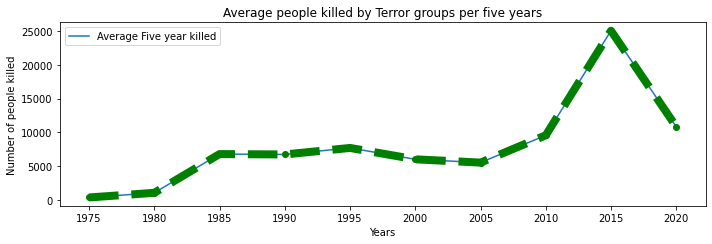

In [53]:

# Plotting the Data
plt.plot(year_li, av_kill_5_year_li, label='Average Five year killed')
  
plt.xlabel('Years')
plt.ylabel('Number of people killed')
plt.title("Average people killed by Terror groups per five years")
  
plt.plot(av_kill_5_year_li, 'o:g', linestyle='--', linewidth='8')
  
plt.legend()


we can see that 2010-2015 had the most peoples killed and was the peak time for terrror activities 

# top 10 countries with most kill

In [54]:
cwmk=x[x.Success==1]

In [55]:
cwmk0=cwmk.groupby("Country").Killed.sum().sort_values(ascending=False)[0:10]
cwmk1=list(cwmk0)
cwmk2=list(cwmk0.index)

Text(0.5, 1.0, 'Kill vs Success')

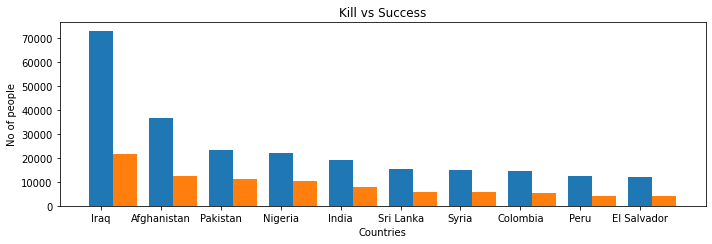

In [56]:
cwma=list(x.groupby("Country").Success.sum().sort_values(ascending=False)[0:10])
w=0.4
bar1=np.arange(len(cwmk2))
bar2=[i+w for i in bar1]
plt.bar(bar1,cwmk1,w,label="kill")
plt.bar(bar2,cwma,w,label="success")
plt.xlabel("Countries")
plt.ylabel("No of people")
plt.xticks(bar1,cwmk2)
plt.title("Kill vs Success")

We see that top 10 countries affected by succuessful attacks from Terror organisation is different from the top 10 countries with kills over the years in these attacks